In [1]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Define parameters
num_samples = 50000  # Total number of samples
anomaly_fraction = 0.05  # Fraction of data that is anomalous
outlier_fraction = 0.01  # Fraction of data that are extreme outliers

# Generate normal data
temperature_normal = np.random.normal(loc=37.5, scale=0.5, size=int(num_samples * (1 - anomaly_fraction - outlier_fraction)))
humidity_normal = np.random.normal(loc=50, scale=5, size=int(num_samples * (1 - anomaly_fraction - outlier_fraction)))
co2_normal = np.random.normal(loc=0.4, scale=0.05, size=int(num_samples * (1 - anomaly_fraction - outlier_fraction)))
o2_normal = np.random.normal(loc=21, scale=0.5, size=int(num_samples * (1 - anomaly_fraction - outlier_fraction)))

# Generate anomalous data
temperature_anomaly = np.random.uniform(low=30, high=45, size=int(num_samples * anomaly_fraction))
humidity_anomaly = np.random.uniform(low=30, high=70, size=int(num_samples * anomaly_fraction))
co2_anomaly = np.random.uniform(low=0.6, high=1.0, size=int(num_samples * anomaly_fraction))
o2_anomaly = np.random.uniform(low=10, high=20, size=int(num_samples * anomaly_fraction))

# Generate outlier data
temperature_outlier = np.random.uniform(low=25, high=50, size=int(num_samples * outlier_fraction))
humidity_outlier = np.random.uniform(low=20, high=80, size=int(num_samples * outlier_fraction))
co2_outlier = np.random.uniform(low=1.1, high=2.0, size=int(num_samples * outlier_fraction))
o2_outlier = np.random.uniform(low=5, high=25, size=int(num_samples * outlier_fraction))

# Combine normal, anomalous, and outlier data
temperature = np.concatenate([temperature_normal, temperature_anomaly, temperature_outlier])
humidity = np.concatenate([humidity_normal, humidity_anomaly, humidity_outlier])
co2 = np.concatenate([co2_normal, co2_anomaly, co2_outlier])
o2 = np.concatenate([o2_normal, o2_anomaly, o2_outlier])

# Shuffle the data
indices = np.arange(num_samples)
np.random.shuffle(indices)

temperature = temperature[indices]
humidity = humidity[indices]
co2 = co2[indices]
o2 = o2[indices]

# Create a DataFrame
data = pd.DataFrame({
    'Sr. No': np.arange(1, num_samples + 1),
    'Temperature (°C)': temperature,
    'Humidity (%)': humidity,
    'CO2 (%)': co2,
    'O2 (%)': o2
})

# Save to CSV
data.to_csv('dummy_anomaly_detection_data_with_outliers.csv', index=False)

# Display the DataFrame
print(data.head())


   Sr. No  Temperature (°C)  Humidity (%)   CO2 (%)     O2 (%)
0       1         37.343716     49.001969  0.339739  22.126188
1       2         36.648084     46.741901  0.344812  21.175773
2       3         37.940905     54.736495  0.399787  20.581584
3       4         36.734935     51.524458  0.422435  20.686614
4       5         37.492846     50.869622  0.425008  21.473909


In [2]:
# Check for negative values
negative_values = (data < 0).any()
# Check for null values
null_values = data.isnull().any()
# Check column types
column_types = data.dtypes
# Display the results
print("Negative Values Check:\n", negative_values)
print("\nNull Values Check:\n", null_values)
print("\nColumn Types:\n", column_types)

Negative Values Check:
 Sr. No              False
Temperature (°C)    False
Humidity (%)        False
CO2 (%)             False
O2 (%)              False
dtype: bool

Null Values Check:
 Sr. No              False
Temperature (°C)    False
Humidity (%)        False
CO2 (%)             False
O2 (%)              False
dtype: bool

Column Types:
 Sr. No                int64
Temperature (°C)    float64
Humidity (%)        float64
CO2 (%)             float64
O2 (%)              float64
dtype: object


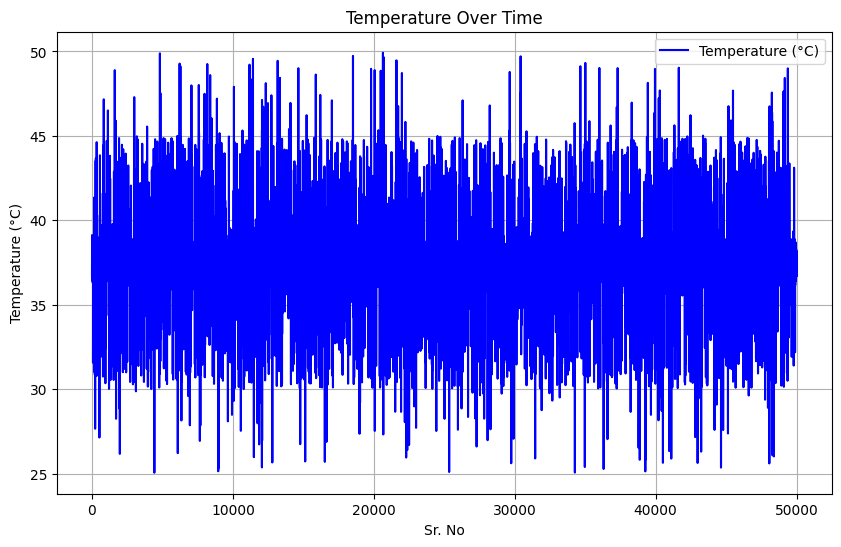

In [3]:
import matplotlib.pyplot as plt

# Plot Temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data['Sr. No'], data['Temperature (°C)'], label='Temperature (°C)', color='blue')
plt.xlabel('Sr. No')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.grid(True)
plt.show()

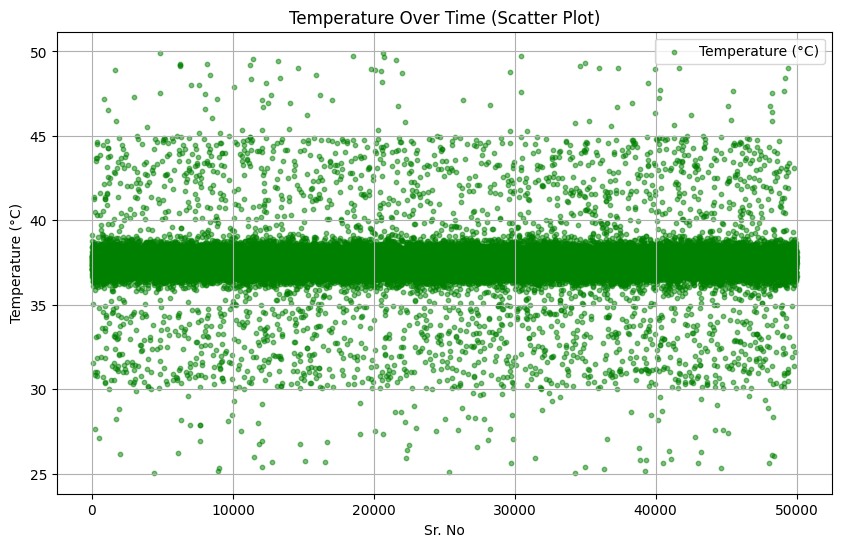

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of Temperature over time
plt.figure(figsize=(10, 6))
plt.scatter(data['Sr. No'], data['Temperature (°C)'], label='Temperature (°C)', color='green', alpha=0.5, s=10)
plt.xlabel('Sr. No')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()


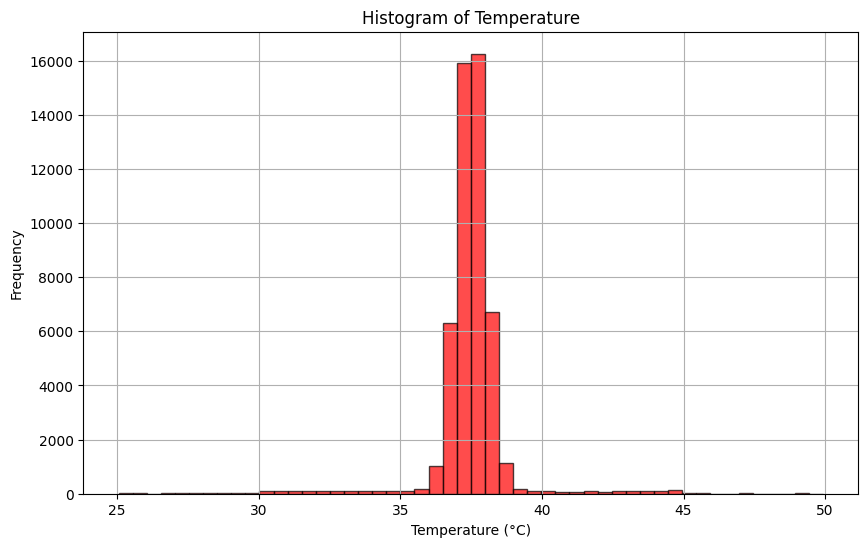

In [7]:
# Histogram of Temperature
plt.figure(figsize=(10, 6))
plt.hist(data['Temperature (°C)'], bins=50, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.grid(True)
plt.show()


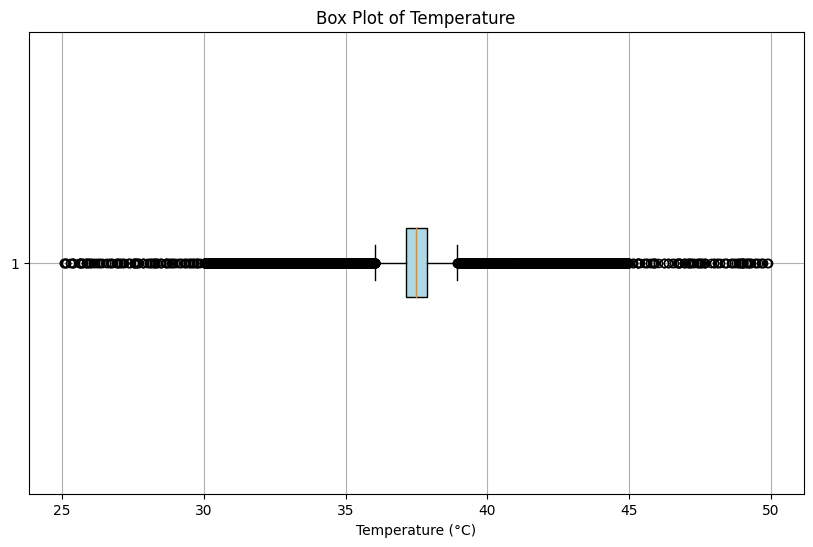

In [8]:
# Box plot of Temperature
plt.figure(figsize=(10, 6))
plt.boxplot(data['Temperature (°C)'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Temperature (°C)')
plt.title('Box Plot of Temperature')
plt.grid(True)
plt.show()


<ipython-input-9-8c5664b09707>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Temperature (°C)'], shade=True, color='blue')


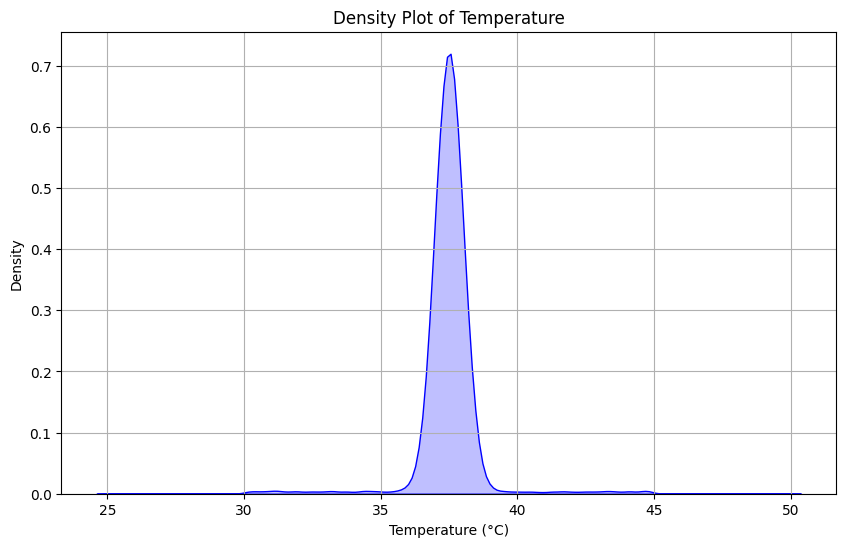

In [9]:
import seaborn as sns

# Density plot of Temperature
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Temperature (°C)'], shade=True, color='blue')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Density Plot of Temperature')
plt.grid(True)
plt.show()


**Enhanced Visualization**



1.   Line Plot with Anomalies: The line plot shows the trend over time, while red
scatter points highlight the detected anomalies.
2.  
Line Plot with Anomalies: The line plot shows the trend over time, while red
scatter points highlight the detected anomalies.
3. Statistical Lines: Mean and standard deviation lines (up to 3 standard deviations) help in understanding the spread and identifying the potential outliers.

4. Color Coding: Different colors are used to distinguish between normal data points, anomalies, and statistical lines.






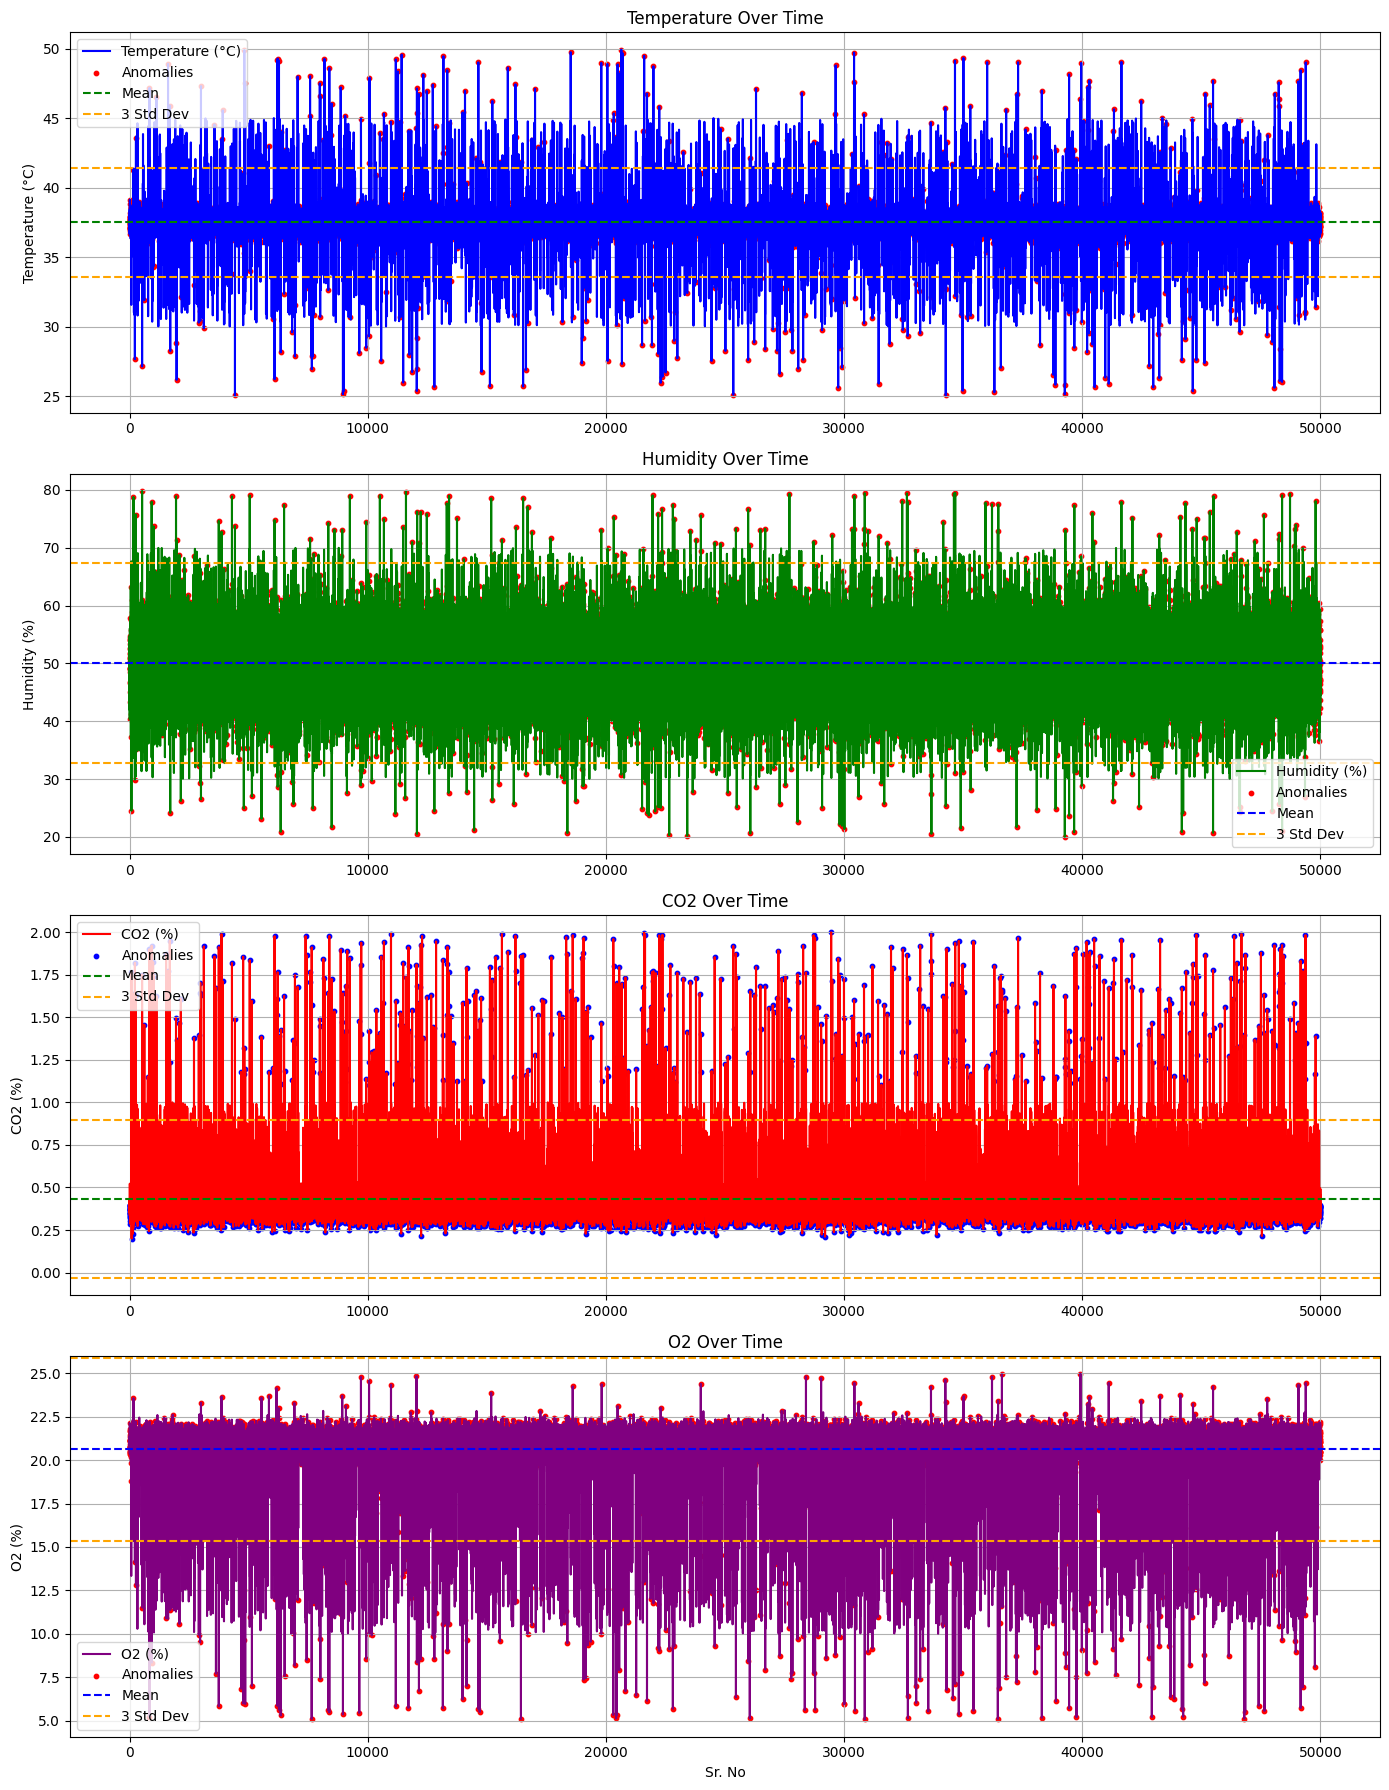

In [10]:
import matplotlib.pyplot as plt

# Identify anomalies based on the generated data
anomaly_mask = (data['Temperature (°C)'] > 45) | (data['Temperature (°C)'] < 30) | \
               (data['Humidity (%)'] > 70) | (data['Humidity (%)'] < 30) | \
               (data['CO2 (%)'] > 1.0) | (data['CO2 (%)'] < 0.4) | \
               (data['O2 (%)'] > 25) | (data['O2 (%)'] < 10)

# Plot all four columns over time with enhanced visualization
plt.figure(figsize=(14, 18))

# Plot Temperature
plt.subplot(4, 1, 1)
plt.plot(data['Sr. No'], data['Temperature (°C)'], label='Temperature (°C)', color='blue')
plt.scatter(data['Sr. No'][anomaly_mask], data['Temperature (°C)'][anomaly_mask], color='red', s=10, label='Anomalies')
plt.axhline(data['Temperature (°C)'].mean(), color='green', linestyle='--', label='Mean')
plt.axhline(data['Temperature (°C)'].mean() + 3*data['Temperature (°C)'].std(), color='orange', linestyle='--', label='3 Std Dev')
plt.axhline(data['Temperature (°C)'].mean() - 3*data['Temperature (°C)'].std(), color='orange', linestyle='--')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.grid(True)

# Plot Humidity
plt.subplot(4, 1, 2)
plt.plot(data['Sr. No'], data['Humidity (%)'], label='Humidity (%)', color='green')
plt.scatter(data['Sr. No'][anomaly_mask], data['Humidity (%)'][anomaly_mask], color='red', s=10, label='Anomalies')
plt.axhline(data['Humidity (%)'].mean(), color='blue', linestyle='--', label='Mean')
plt.axhline(data['Humidity (%)'].mean() + 3*data['Humidity (%)'].std(), color='orange', linestyle='--', label='3 Std Dev')
plt.axhline(data['Humidity (%)'].mean() - 3*data['Humidity (%)'].std(), color='orange', linestyle='--')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.legend()
plt.grid(True)

# Plot CO2
plt.subplot(4, 1, 3)
plt.plot(data['Sr. No'], data['CO2 (%)'], label='CO2 (%)', color='red')
plt.scatter(data['Sr. No'][anomaly_mask], data['CO2 (%)'][anomaly_mask], color='blue', s=10, label='Anomalies')
plt.axhline(data['CO2 (%)'].mean(), color='green', linestyle='--', label='Mean')
plt.axhline(data['CO2 (%)'].mean() + 3*data['CO2 (%)'].std(), color='orange', linestyle='--', label='3 Std Dev')
plt.axhline(data['CO2 (%)'].mean() - 3*data['CO2 (%)'].std(), color='orange', linestyle='--')
plt.ylabel('CO2 (%)')
plt.title('CO2 Over Time')
plt.legend()
plt.grid(True)

# Plot O2
plt.subplot(4, 1, 4)
plt.plot(data['Sr. No'], data['O2 (%)'], label='O2 (%)', color='purple')
plt.scatter(data['Sr. No'][anomaly_mask], data['O2 (%)'][anomaly_mask], color='red', s=10, label='Anomalies')
plt.axhline(data['O2 (%)'].mean(), color='blue', linestyle='--', label='Mean')
plt.axhline(data['O2 (%)'].mean() + 3*data['O2 (%)'].std(), color='orange', linestyle='--', label='3 Std Dev')
plt.axhline(data['O2 (%)'].mean() - 3*data['O2 (%)'].std(), color='orange', linestyle='--')
plt.xlabel('Sr. No')
plt.ylabel('O2 (%)')
plt.title('O2 Over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Dataset Prepration**

In [15]:
# Define safe ranges based on provided parameters, assigning 0 or 1
def add_safe_ranges_with_binary(df):
    df['Temp Safe Range'] = df['Temperature (°C)'].apply(lambda x: 1 if 37.5 - 0.5 <= x <= 37.5 + 0.5 else 0)
    df['Humidity Safe Range'] = df['Humidity (%)'].apply(lambda x: 1 if 45 <= x <= 55 else 0)
    df['CO2 Safe Range'] = df['CO2 (%)'].apply(lambda x: 1 if x < 0.5 else 0)
    df['O2 Safe Range'] = df['O2 (%)'].apply(lambda x: 1 if x > 20.9 else 0)
    return df

# Add the safe ranges with binary values to the dataframe
data_with_safe_ranges  = add_safe_ranges_with_binary(data)
# Show the first few rows of the updated dataframe
data_with_safe_ranges .head()

,Sr. No,Temperature (°C),Humidity (%),CO2 (%),O2 (%),Temp Safe Range,Humidity Safe Range,CO2 Safe Range,O2 Safe Range
0,1,37.343716,49.001969,0.339739,22.126188,1,1,1,1
1,2,36.648084,46.741901,0.344812,21.175773,0,1,1,1
2,3,37.940905,54.736495,0.399787,20.581584,1,1,1,0
3,4,36.734935,51.524458,0.422435,20.686614,0,1,1,0
4,5,37.492846,50.869622,0.425008,21.473909,1,1,1,1


**Model** **Training**

In [17]:
import pandas as pd

# Load the dataset
file_path = '/content/dummy_anomaly_detection_data_with_outliers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Sr. No,Temperature (°C),Humidity (%),CO2 (%),O2 (%)
0,1,37.343716,49.001969,0.339739,22.126188
1,2,36.648084,46.741901,0.344812,21.175773
2,3,37.940905,54.736495,0.399787,20.581584
3,4,36.734935,51.524458,0.422435,20.686614
4,5,37.492846,50.869622,0.425008,21.473909


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define a function to create an anomaly column based on the conditions
def identify_anomalies(row):
    if row['Temperature (°C)'] > 45 or row['Temperature (°C)'] < 30 or \
       row['Humidity (%)'] > 70 or row['Humidity (%)'] < 30 or \
       row['CO2 (%)'] > 1.0 or row['CO2 (%)'] < 0.4 or \
       row['O2 (%)'] > 25 or row['O2 (%)'] < 10:
        return 1
    else:
        return 0

# Create the 'Anomaly' column
data['Anomaly'] = data.apply(identify_anomalies, axis=1)

# Define features and target
features = data.drop(columns=['Anomaly', 'Sr. No'])
target = 'Anomaly'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.3, random_state=42)

# Train and evaluate Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
print(f"Classification Report for {target} using Random Forest:\n")
print(classification_report(y_test, predictions_rf))

# Display actual vs predicted values
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_rf})
print(f"Actual vs Predicted values for {target} using Random Forest:\n")
print(results_rf.head())


Classification Report for Anomaly using Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7730
           1       1.00      1.00      1.00      7270

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Actual vs Predicted values for Anomaly using Random Forest:

       Actual  Predicted
33553       1          1
9427        0          0
199         0          0
12447       1          1
39489       1          1


***All ML models***

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, predictions))
    print("\n" + "="*60 + "\n")

    # Display actual vs predicted values for each model
    results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    print(f"Actual vs Predicted values for {name}:\n")
    print(results.head())


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7730
           1       0.90      0.90      0.90      7270

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



Actual vs Predicted values for Logistic Regression:

       Actual  Predicted
33553       1          0
9427        0          0
199         0          0
12447       1          1
39489       1          1
Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      7730
           1       0.97      0.00      0.01      7270

    accuracy                           0.52     15000
   macro avg       0.74      0.50      0.34     15000
weighted avg       0.74      0.52      0.35     15000



Actual vs Predicted values for Support V